In [1]:
import sys
from matplotlib import pyplot as plt
import numpy as np

sys.path.append('../..')
from heat_load_calc.window import Window

In [2]:
w_s = Window(u_w_j=3.0, eta_w_j=0.5, glass_type=Window.GlassType.SINGLE, r_a_w_g_j=0.72, flame_type=Window.FlameType.RESIN)
w_m = Window(u_w_j=3.0, eta_w_j=0.5, glass_type=Window.GlassType.MULTIPLE, r_a_w_g_j=0.72, flame_type=Window.FlameType.RESIN)

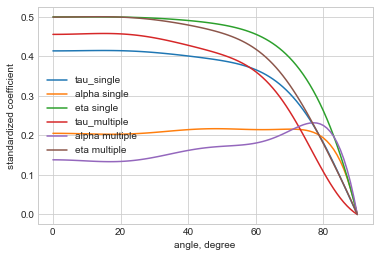

In [3]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = fig.subplots()

phi = np.arange(start= 0.0, stop= 91.0, step = 1.0)
ax.plot(phi, np.vectorize(w_s.get_tau_w_j_n)(phi_n=np.radians(phi)), label='tau_single')
ax.plot(phi, np.vectorize(w_s.get_alpha_w_j_n)(phi_n=np.radians(phi)), label='alpha single')
ax.plot(phi, np.vectorize(w_s.get_eta_w_j_n)(phi_n=np.radians(phi)), label='eta single')
ax.plot(phi, np.vectorize(w_m.get_tau_w_j_n)(phi_n=np.radians(phi)), label='tau_multiple')
ax.plot(phi, np.vectorize(w_m.get_alpha_w_j_n)(phi_n=np.radians(phi)), label='alpha multiple')
ax.plot(phi, np.vectorize(w_m.get_eta_w_j_n)(phi_n=np.radians(phi)), label='eta multiple')

ax.set_xlabel('angle, degree')
ax.set_ylabel('standardized coefficient')

plt.legend()
plt.show()

In [4]:
def get_tau_BEST(phi: float, glass_type: str) -> float:
    Bs = {
        'single': [2.559, 1.488, -11.744, 13.988, -5.281],
        'double': [0.184, 10.776, -25.624, 23.28, -7.586],
        'triple': [-0.611, 11.513, -22.221, 17.175, -4.806]
    }[glass_type]
    return sum([B * np.cos(phi) ** (n + 1) for (n, B) in enumerate(Bs)])


In [5]:
def get_eta_BEST(phi: float, glass_type: str) -> float:
    As = {
        'single': [3.544, -3.697, -1.159, 4.332, -2.012],
        'double': [1.693, 3.873, -13.041, 12.767, -4.276],
        'triple': [1.121, 4.968, -12.456, 10.486, -3.094]
    }[glass_type]
    return sum([A * np.cos(phi) ** (n + 1) for (n, A) in enumerate(As)])

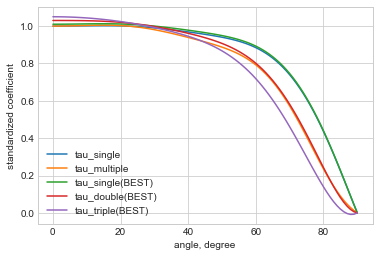

In [6]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = fig.subplots()

phi = np.arange(start= 0.0, stop= 91.0, step = 1.0)

tau_s0 = w_s._get_tau_w_g_j_phi(phi=0.0)
tau_m0 = w_m._get_tau_w_g_j_phi(phi=0.0)

ax.plot(phi, np.vectorize(w_s._get_tau_w_g_j_phi)(phi=np.radians(phi)) / tau_s0, label='tau_single')
ax.plot(phi, np.vectorize(w_m._get_tau_w_g_j_phi)(phi=np.radians(phi)) / tau_m0, label='tau_multiple')
ax.plot(phi, np.vectorize(get_tau_BEST)(phi=np.radians(phi), glass_type='single'), label='tau_single(BEST)')
ax.plot(phi, np.vectorize(get_tau_BEST)(phi=np.radians(phi), glass_type='double'), label='tau_double(BEST)')
ax.plot(phi, np.vectorize(get_tau_BEST)(phi=np.radians(phi), glass_type='triple'), label='tau_triple(BEST)')

ax.set_xlabel('angle, degree')
ax.set_ylabel('standardized coefficient')

plt.legend()
plt.show()

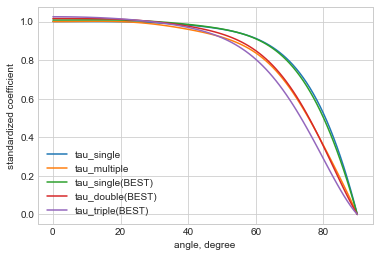

In [7]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = fig.subplots()

phi = np.arange(start= 0.0, stop= 91.0, step = 1.0)

eta_s0 = w_s._get_eta_w_g_j_phi(phi=0.0)
eta_m0 = w_m._get_eta_w_g_j_phi(phi=0.0)

ax.plot(phi, np.vectorize(w_s._get_eta_w_g_j_phi)(phi=np.radians(phi)) / eta_s0, label='tau_single')
ax.plot(phi, np.vectorize(w_m._get_eta_w_g_j_phi)(phi=np.radians(phi)) / eta_m0, label='tau_multiple')
ax.plot(phi, np.vectorize(get_eta_BEST)(phi=np.radians(phi), glass_type='single'), label='tau_single(BEST)')
ax.plot(phi, np.vectorize(get_eta_BEST)(phi=np.radians(phi), glass_type='double'), label='tau_double(BEST)')
ax.plot(phi, np.vectorize(get_eta_BEST)(phi=np.radians(phi), glass_type='triple'), label='tau_triple(BEST)')

ax.set_xlabel('angle, degree')
ax.set_ylabel('standardized coefficient')

plt.legend()
plt.show()